## NO AUGMENT - Fashion MNIST
---
* Using PyTorch
* PyTorch Vision - FashionMNIST

In [2]:
import os
import sys

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

from models import (
    LeNet5,
    ResNetTiny,
    DenseNetTiny,
    MobileNetTiny,
    ViTTiny,
    SqueezeNetTiny,
    GoogLeNetTiny,
    )
from utils import train_eval_report
from utils import visualise_fashion_mnist
from utils.globals import BATCH_SIZE, LEARNING_RATE
from utils.globals import device, loss_fn  #, early_stopper

In [3]:
# import dataset - fashion MNIST

# Specify transforms
transform = transforms.Compose([
    # transforms.Resize(??),
    transforms.ToTensor(),       # Convert from image.PIL to tensors
])

download = not os.path.exists('./data/FashionMNIST')
train_dataset = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=download, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=download, transform=transform)

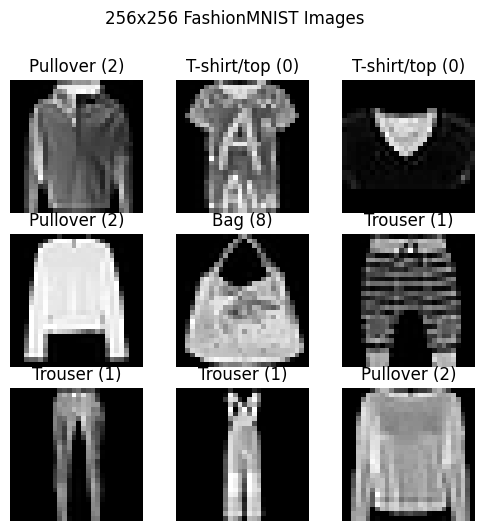

In [4]:
# test sample
visualise_fashion_mnist(train_dataset)

In [5]:
# Setting up data loaders
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

# Check that the dataloader works
images, labels = next(iter(train_dataloader))
sample_image, sample_label = images[0], labels[1]
sample_image.shape, sample_label

(torch.Size([1, 28, 28]), tensor(1))

In [6]:
# lenet5 = LeNet5()
# optimizer = torch.optim.Adam(params=lenet5.parameters(), lr=LEARNING_RATE)

# report_lenet5 = train_eval_report(
#     model=lenet5,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=None,
#     device=device,
# )

# report_lenet5

In [7]:
# resnet_mini = ResNetMini(base_channels=4)  # Drastically lowered for computational efficiency while developing
# optimizer = torch.optim.Adam(params=resnet_mini.parameters(), lr=LEARNING_RATE)

# report_resnet = train_eval_report(
#     model=resnet_mini,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=None,
#     device=device,
# )

# report_resnet

In [8]:
# densenet_tiny = DenseNetTiny()
# optimizer = torch.optim.Adam(params=densenet_tiny.parameters(), lr=LEARNING_RATE)

# report_densenet = train_eval_report(
#     model=densenet_tiny,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=None,
#     device=device,
# )

# report_densenet

In [9]:
# mobilenet_lite = MobileNetLite()
# optimizer = torch.optim.Adam(params=mobilenet_lite.parameters(), lr=LEARNING_RATE)

# report_mobilenet = train_eval_report(
#     model=mobilenet_lite,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=None,
#     device=device,
# )

# report_mobilenet

In [10]:
# vit_tiny = ViTTiny()
# optimizer = torch.optim.Adam(params=vit_tiny.parameters(), lr=LEARNING_RATE)

# report_vit = train_eval_report(
#     model=vit_tiny,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=None,
#     device=device,
# )

# report_vit

In [11]:
# squeezenet = SqueezeNetTiny(base_channels=8)
# optimizer = torch.optim.Adam(params=squeezenet.parameters(), lr=LEARNING_RATE)

# report_squeezenet = train_eval_report(
#     model=squeezenet,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=None,
#     device=device,
# )

# report_squeezenet

In [ ]:
# googlenet_tiny = GoogLeNetTiny(base_channels=8)
# optimizer = torch.optim.Adam(params=googlenet_tiny.parameters(), lr=LEARNING_RATE)

# report_googlenet = train_eval_report(
#     model=googlenet_tiny,
#     train_dataloader=train_dataloader,
#     test_dataloader=test_dataloader,
#     optimizer=optimizer,
#     loss_fn=loss_fn,
#     early_stopper=None,
#     device=device,
# )

# report_googlenet

In [ ]:
# sum(p.numel() for p in googlenet_tiny.parameters() if p.requires_grad) # 3180! Wow!

3180